In [147]:
from utils import print_code, solar_angles_to_vector
import numpy
from IPython.core.display import HTML
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt


In [148]:
HTML(print_code(solar_angles_to_vector))

In [149]:
vec = solar_angles_to_vector(135, 179)
print(vec)

[-0.70699909  0.70699909  0.01745241]


In [150]:
import numpy as np
from datetime import datetime

def solar_position(date, lat, lng):
    """
    Calculate the azimuth and altitude of the sun for a given date, latitude and longitude.

    Parameters:
    date (datetime): Date to calculate for
    lat (float): Latitude in degrees
    lng (float): Longitude in degrees
    
    Returns:
    dict: Azimuth and altitude in radians
    """

    # Constants
    rad = np.pi / 180
    epochStart = datetime(1970, 1, 1) 
    J1970 = 2440588
    J2000 = 2451545
    dayMs = 24 * 60 * 60 * 1000
    e = rad * 23.4397 # obliquity of the Earth

    # Convert date to required formats
    ms = (date - epochStart).total_seconds() * 1000
    julian = ms / dayMs - 0.5 + J1970 
    days = julian - J2000

    # Calculate right ascension and declination
    M = rad * (357.5291 + 0.98560028 * days) # Solar mean anomaly
    C = rad * (1.9148 * np.sin(M) + 0.02 * np.sin(2 * M) + 0.0003 * np.sin(3 * M)) # Equation of center
    P = rad * 102.9372 # Perihelion of Earth
    L = M + C + P + np.pi # Ecliptic longitude
    dec = np.arcsin(np.sin(0) * np.cos(e) + np.cos(0) * np.sin(e) * np.sin(L)) 
    ra = np.arctan2(np.sin(L) * np.cos(e), np.cos(L))

    # Calculate sidereal time
    lw = rad * -lng
    st = rad * (280.16 + 360.9856235 * days) - lw

    # Calculate azimuth and altitude
    H = st - ra
    az = np.radians(180) + np.arctan2(np.sin(H), np.cos(H) * np.sin(rad * lat) - np.tan(dec) * np.cos(rad * lat))
    # if az < 0:
    #     az += 2 * np.pi 
    alt = np.arcsin(np.sin(rad * lat) * np.sin(dec) + np.cos(rad * lat) * np.cos(dec) * np.cos(H))

    return az, alt


date = datetime(2023, 2, 15, 2, 0, 0)
lat = 51.5085 # London
lng = -0.1257

az, alt = solar_position(date, lat, lng)

print(f"Azimuth: {np.degrees(az):.2f} degrees")
print(f"Altitude: {np.degrees(alt):.2f} degrees")

Azimuth: 38.31 degrees
Altitude: -46.01 degrees


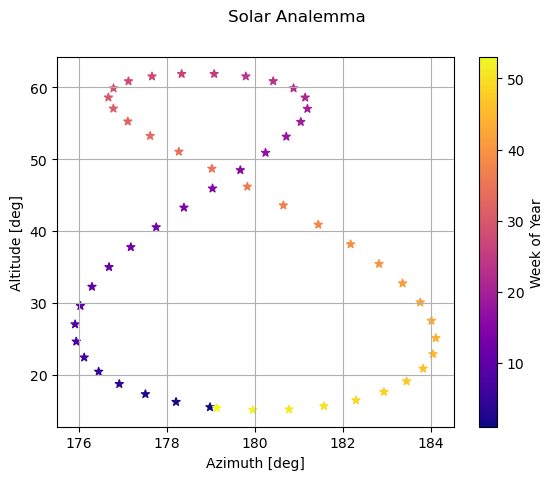

In [151]:
start_date = '2023-01-01 12:00:00'
end_date = '2023-12-31 12:00:00'
date_range = pd.date_range(start=start_date, end=end_date, freq="W")
sun_pos = np.empty([len(date_range), 2])
fig, ax = plt.subplots()
fig.suptitle("Solar Analemma")
for i, date in enumerate(date_range):
    az, alt = solar_position(date, lat, lng)
    sun_pos[i,:] = az, alt

scat = ax.scatter(*np.rad2deg(sun_pos).T, marker="*", c=date_range.strftime('%U').astype(int).tolist(), cmap='plasma')
cbar = plt.colorbar(scat, ax = ax)
cbar.set_label('Week of Year')
ax.set(xlabel = "Azimuth [deg]",
       ylabel = "Altitude [deg]",
       aspect = "auto")
ax.grid()
plt.show()

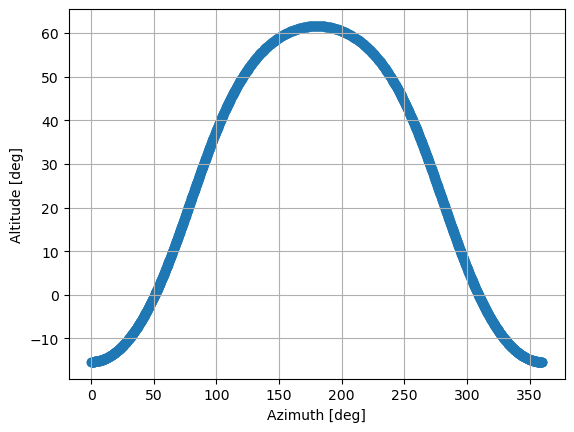

In [152]:
start_date = '2023-07-01 00:00:00'
end_date = '2023-07-01 23:59:59'
date_range = pd.date_range(start=start_date, end=end_date, freq="min")
sun_pos = np.zeros([len(date_range), 2])
sun_vec = np.zeros([len(date_range), 3])
fig, ax = plt.subplots()
for i, date in enumerate(date_range):
    az, alt = solar_position(date, lat, lng)
    sun_pos[i,:] = az, alt
    sun_vec[i,:] = solar_angles_to_vector(np.rad2deg(az), np.rad2deg(alt))

ax.scatter(*np.rad2deg(sun_pos).T)
ax.set(xlabel = "Azimuth [deg]",
       ylabel = "Altitude [deg]",
       aspect = "auto")
ax.grid()
plt.show()

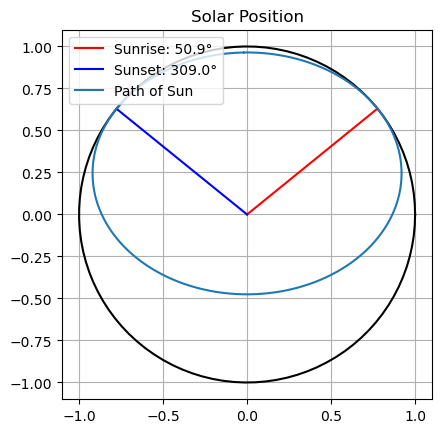

In [153]:
positive_indices = np.where(sun_pos[:,1] > 0)[0]

if positive_indices.size > 0:
    first_azimuth, last_azimuth = sun_pos[positive_indices[[0, -1]], 0]

import matplotlib.pyplot as plt
import numpy as np

# Create a unit circle
theta = np.linspace(0, 2 * np.pi, 100)
x = np.cos(theta)
y = np.sin(theta)

fig, ax = plt.subplots()
ax.plot(x, y, 'k') # circle
ax.plot([0, np.sin(first_azimuth)], [0, np.cos(first_azimuth)], 'r', label=f'Sunrise: {np.rad2deg(first_azimuth):.1f}°')
ax.plot([0, np.sin(last_azimuth)], [0, np.cos(last_azimuth)], 'b', label=f'Sunset: {np.rad2deg(last_azimuth):.1f}°')
ax.plot(sun_vec[:,0], sun_vec[:,1], label = "Path of Sun")

ax.legend(loc = "upper left")
ax.set_aspect('equal', adjustable='box')
plt.title('Solar Position')
plt.grid()
plt.show()



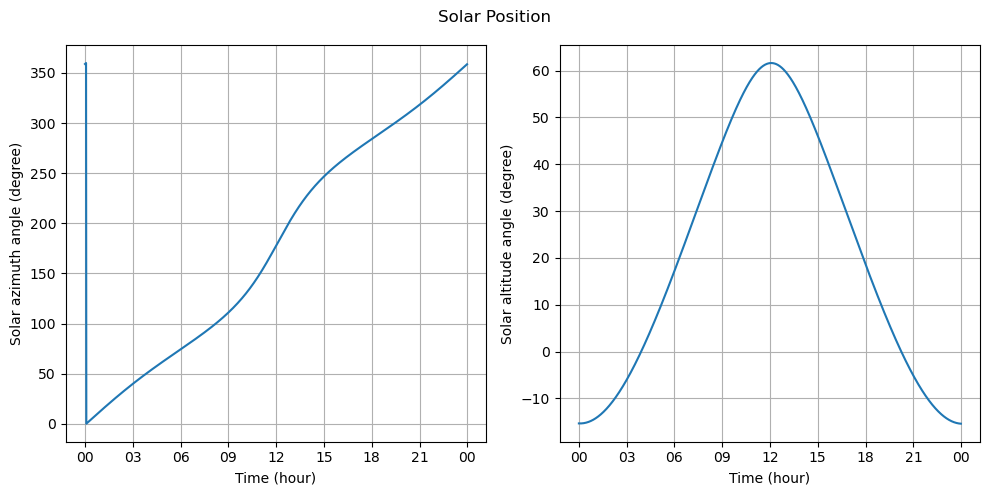

In [154]:
import matplotlib.dates as mdates

# Plots for solar zenith and solar azimuth angles
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Solar Position')

# plot for solar zenith angle
axs[0].plot(date_range, np.rad2deg(sun_pos[:,0]))
axs[0].set_ylabel('Solar azimuth angle (degree)')
axs[0].set_xlabel('Time (hour)')
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%H'))

# plot for solar azimuth angle
axs[1].plot(date_range,  np.rad2deg(sun_pos[:,1]))
axs[1].set_ylabel('Solar altitude angle (degree)')
axs[1].set_xlabel('Time (hour)')
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%H'))

[ax.grid(True) for ax in axs.flatten()]
plt.tight_layout()
